### Stacked Histogram Curves for data population with errors.
This type of diagram is often used to show the age distribution for isotope age determinations for a large number of measurements. Here, the sample data file contains zircon U-Pb data of five samples. For each analysis the gaussian error curve is calculated. A sum curve is construced by adding up all individual error curves. \
The program uses the FacetGrid Object of the seaborn module. Part of the code is from the seaborn example code.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

Two functions are defined. gy calculates a gaussian error curve for one age. It returns an numpy 2D-array that can be plotted. This function is only needed if individual curves have to to be displayed. \
fun_sumcurve calculates a sumcurve for an array of ages and their errors in an age range which is defined in the first statement of the function.

Max. age: 1133.7228714524208
Max. age: 937.3956594323873
Max. age: 933.3889816360601
Max. age: 1141.736227045075
Max. age: 1474.2904841402337


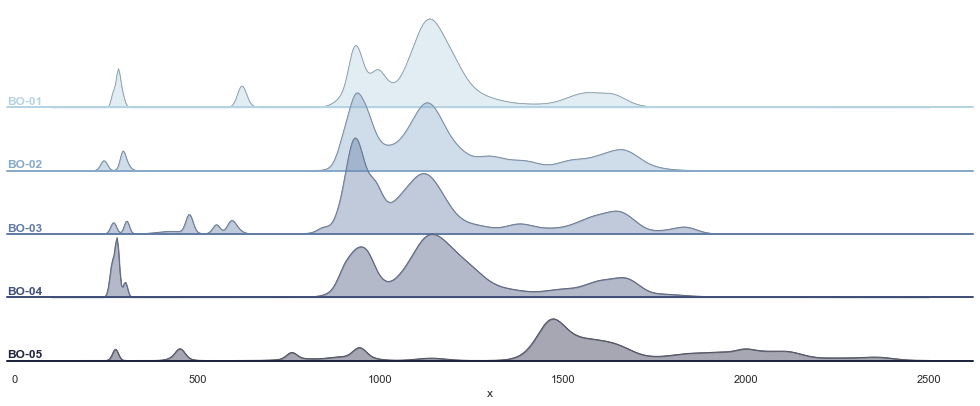

In [5]:
def gy(ag, error):
    data=np.linspace(ag-3*error, ag+3*error, 80)
    y=np.zeros(np.size(data), dtype=float)
    results=np.zeros(shape=(2, np.size(data)))
    i=0
    for x in data:
        y[i]= 1/(error * np.sqrt(2*np.pi)) * np.exp(-np.power((x-ag),2)/2/np.power(error,2))
        i=i+1
    results[0,:]=data
    results[1,:]=y
    return results

def fun_sumcurve(ages, errors):
    data=np.linspace(100, 2500, 600)
    y=np.zeros(np.size(data), dtype=float)
    results=np.zeros(shape=(2, np.size(data)))
    j=0   
    for index, value in enumerate(data):
        y[index]=0
        for count, age in enumerate(ages):
            y[index]= y[index] + 1/(errors[count] * np.sqrt(2*np.pi)) * np.exp(-np.power((value-age),2)/2/np.power(errors[count],2))            
    results[0,:]=data
    results[1,:]=y
    return results


# Create the data
age=[]
err=[]
df = pd.read_csv('zcn-bo-data.txt', sep="\t", header=None, names=['sample', 'id', 'age', 'err']) 
sample_list = df['sample'].unique()

nosteps=600
noc=sample_list.size

xdata=np.linspace(100, 2500, nosteps)
scarray = np.zeros(shape=(nosteps, noc))
i=0
for s in sample_list:
    dfsample=df[df['sample'] == s]
    anarray = fun_sumcurve(dfsample['age'].to_numpy(), dfsample['err'].to_numpy())
    scarray[:,i]=anarray[1,:].T
    mv = np.argmax(anarray[1,:])
    print("Max. age:",anarray[0,mv])
    i+=1
    
df_sum = pd.DataFrame(data=scarray, columns=sample_list)
df_sum["x"] = anarray[0,:].tolist()
df_sum = df_sum.melt('x', var_name='cols', value_name='vals')


# Initialize the FacetGrid object
pal = sns.cubehelix_palette(noc, rot=-.15, light=.8)
g = sns.FacetGrid(data=df_sum, row="cols", hue="cols", aspect=12, height=1.2, palette=pal)

# Draw the densities in a few steps
g.map(plt.plot, "x", "vals", alpha=1, linewidth=1.)
g.map(plt.fill_between, "x", "vals", alpha=0.4)
g.map(plt.plot, "x", "vals", clip_on=False, color="gray", lw=0.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .1, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.4)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
plt.savefig('output.pdf')
plt.show()